In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
data = pd.read_csv("train.csv")

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Working with single data/variable

## 1. Working with qualitative/categorical data

**a. Frequency Distribution Table**

- frquency mean occurance of a event

|Degree|Frequency|
|---|:-:|
|High School|2|  
|Bachelor's|7|  
|MBA|20|  
|Master's|3|
|Law|4|
|PHD|4|
| |40|

In [8]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

*The columns `Pclass` has categorical data as it refers to passenger's class. more precisely ordinal.*

In [9]:
data['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

Now lets plot it  
b.**BAR CHART**

<Axes: xlabel='Pclass'>

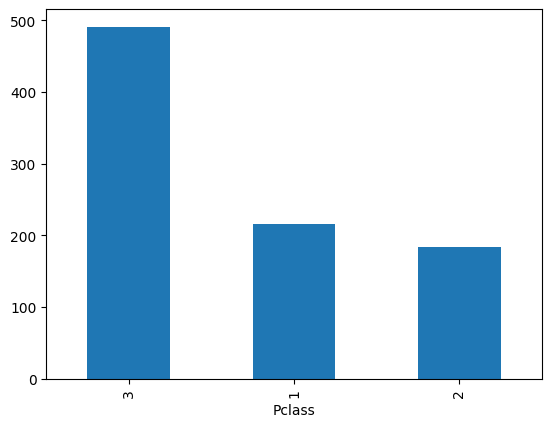

In [12]:
data['Pclass'].value_counts().plot(kind='bar')

c. **PIE CHART**  
Rather than giving number it give total share of a value w.r.t to total values.

<Axes: ylabel='count'>

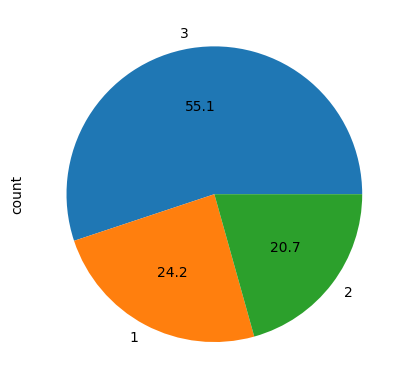

In [18]:
#data['Pclass'].value_counts().plot(kind='pie')
data['Pclass'].value_counts().plot(kind='pie', autopct='%0.1f')

d. **Cumulative Frequency**

Frequency means total number of times an event occurs.  
_Cummilative Frequency_ refers to running total of frquencies.

|Degree|Frequency|**Cumulative Frequency**|
|---|:-:|:-:|
|High School|2|2|  
|Bachelor's|7|9|
|MBA|20|29|
|Master's|3|32|
|Law|4|36|
|PHD|4|40|
| |40||

In [20]:
a = data['Pclass'].value_counts()

In [22]:
b = ((a/a.sum())*100).values
b

array([55.10662177, 24.24242424, 20.65095398])

In [24]:
c=[]
cf=0
for i in b:
    cf = cf + i
    c.append(cf)

In [25]:
c

[np.float64(55.106621773288445),
 np.float64(79.34904601571269),
 np.float64(100.0)]

`marker = ' '`
| Code  | Shape            |
| ----- | ---------------- |
| `'o'` | Circle           |
| `'^'` | Triangle up      |
| `'v'` | Triangle down    |
| `'s'` | Square           |
| `'p'` | Pentagon         |
| `'*'` | Star             |
| `'D'` | Diamond (filled) |
| `'d'` | Thin diamond     |
| `'x'` | X                |
| `'+'` | Plus sign        |

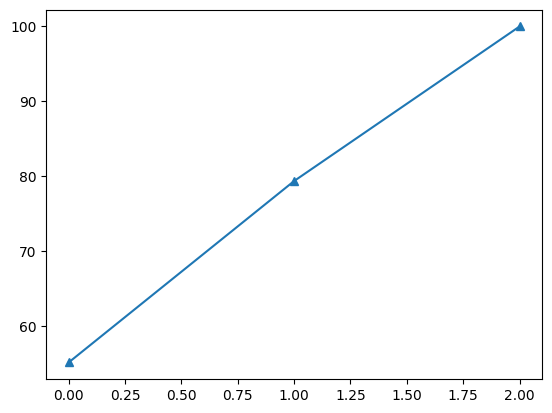

In [35]:
plt.plot(c, marker='^')

## 2. Working with quantative/numercial data

**a. Histogram**

_lets start ploting age now_

In [38]:
data['Age'].value_counts()

Age
24.00    30
22.00    27
18.00    26
28.00    25
30.00    25
         ..
24.50     1
0.67      1
0.42      1
34.50     1
74.00     1
Name: count, Length: 88, dtype: int64

<Axes: xlabel='Age'>

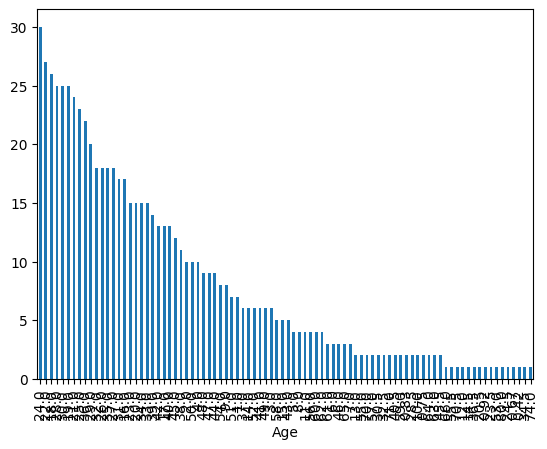

In [40]:
data['Age'].value_counts().plot(kind='bar')

can be clearly seen the data has too many categories to be represented on a simple bar graph

In [45]:
d = data['Age'].values #Gives an array

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

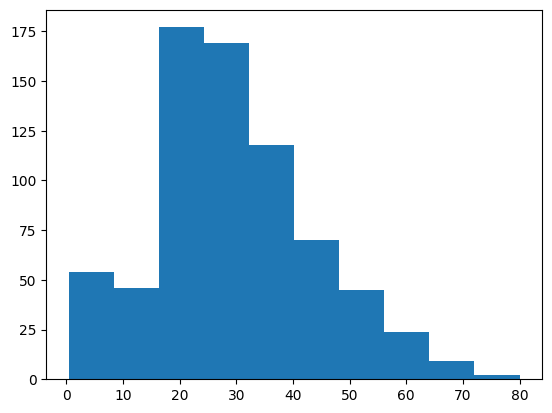

In [46]:
plt.hist(d)

**b. Boxplots**

<Axes: xlabel='Age'>

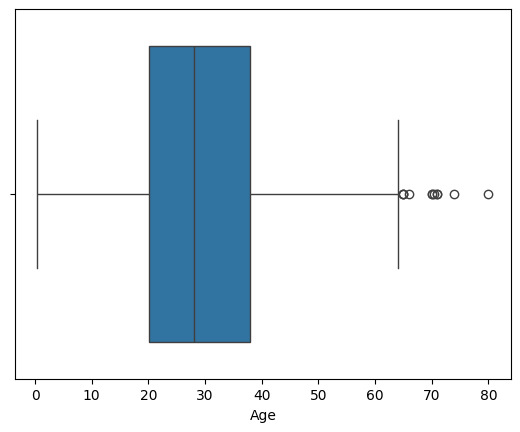

In [56]:
sns.boxplot(x='Age', data=data)

In [59]:
a=data.dropna(subset=['Age'])
a=a['Age'].values
np.median(a)

np.float64(28.0)

**c. Kdeplot**

<Axes: xlabel='Age', ylabel='Density'>

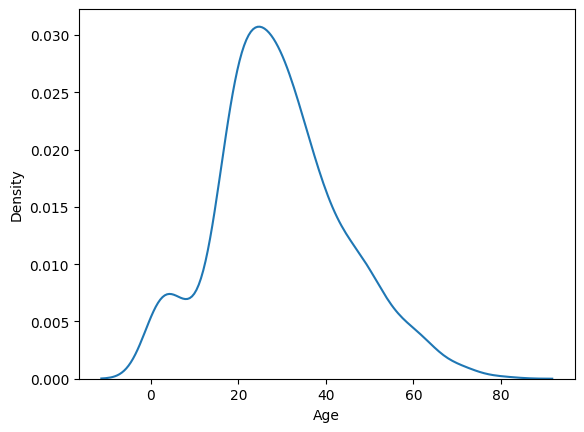

In [60]:
sns.kdeplot(data['Age'])

# Working with 2 data/variable (Bivariate Analysis)

## 1. Categorical vs Numerical


**a. Box Plot**

<Axes: xlabel='Pclass', ylabel='Age'>

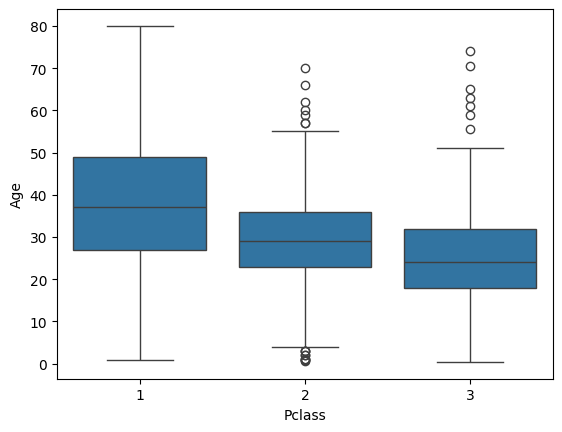

In [64]:
sns.boxplot(x=data['Pclass'],y=data['Age'])

**b. Bar Plot** tells average

<Axes: xlabel='Pclass', ylabel='Age'>

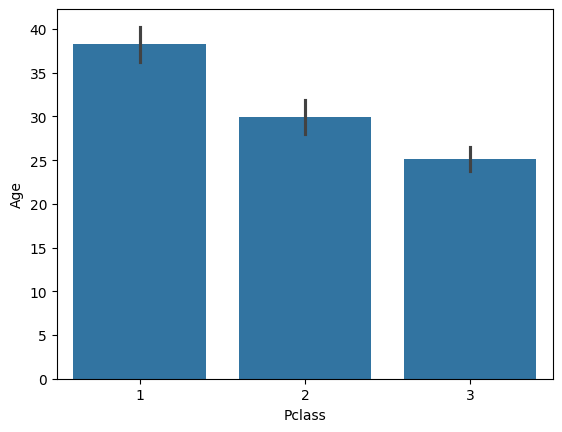

In [66]:
sns.barplot(x='Pclass',y='Age',data=data)


## 2. Numerical vs Numerical

**a. Scatter Plot**

In [67]:
m = data['Age'].values
n = data['Fare'].values

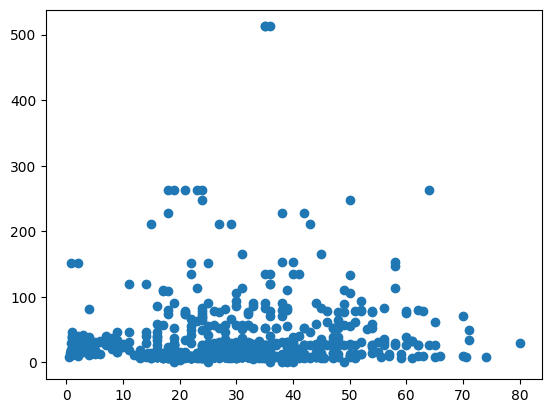

In [68]:
plt.scatter(m,n)

## 3. Categorical Vs Categorical

**a. Cross Tables/Contingency Table**

<Axes: xlabel='Pclass'>

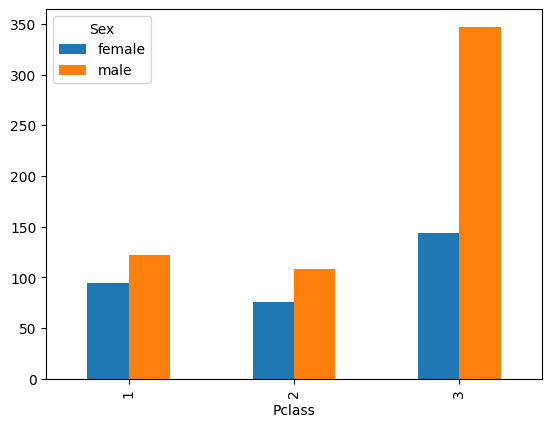

In [70]:
pd.crosstab(data['Pclass'],data['Sex']).plot(kind='bar')

In [72]:
ct=pd.crosstab(data['Pclass'],data['Sex'])

<Axes: xlabel='Sex', ylabel='Pclass'>

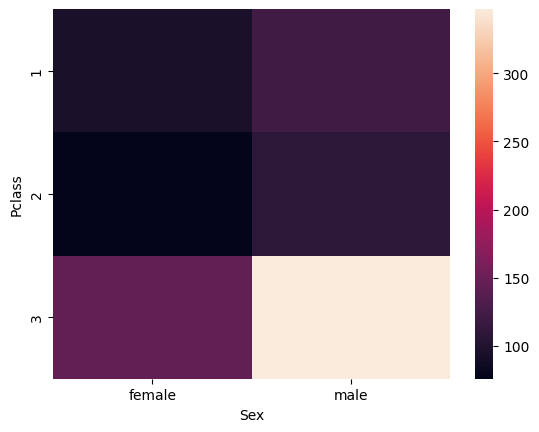

In [73]:
sns.heatmap(ct)

In [74]:
ct

Sex,female,male
Pclass,,
1,94,122
2,76,108
3,144,347
